In [1]:
import numpy as np
from matplotlib import pyplot as plt
from deep_translator import GoogleTranslator
from sklearn.manifold import TSNE # https://habr.com/en/company/vk/blog/449984/
from adjustText import adjust_text
from matplotlib.lines import Line2D #to create independend legend

In [2]:
#Pre-trained glove word embedding
Ndim = 100
glove_file = "glove.6B.100d.txt"
embeddings_index = {}
#create dictionairy
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word.lower()] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [3]:
list_words = []
list_freq = []
list_LANG = []
list_x100 = []
LANGs = ["de","ja","fr","en"]

stopwords = ["cv","website","websites","page","contact","privacy","more","major"]#website specific or no meaning without context
#remove for less crowded

In [4]:
for LANG in LANGs:
    file = "sorted_list_"+LANG+".txt"
    words = np.genfromtxt(file,usecols=2,dtype=str)
    frequency = np.genfromtxt(file,usecols=1,dtype=float)

    N_tot = np.sum(frequency)
    freq_rel = frequency/N_tot
    for i, word in enumerate(words):
        if(frequency[i] > 2):#use only words that appear more than 2 times
            #translate and enforce lower case
            if(LANG == "en"):
                word_en = word.lower()
            else:
                word_en = GoogleTranslator(source=LANG, target='en').translate(word).lower()
            
            if(word_en in stopwords):
                continue
            
            #check if word exists already in this language
            #can happen that multiple words translate to same word in english
            i_new = True
            for j,word_check in enumerate(list_words):
                if(word_check == word_en and list_LANG[j] == LANG):
                    print("exists already:",word_en)
                    list_freq[j] += freq_rel[i]
                    i_new = False
                    break
            
            embedding_vector = embeddings_index.get(word_en)
            if (embedding_vector is not None and i_new):
                list_x100.append(embedding_vector)
                list_words.append(word_en)
                list_freq.append(freq_rel[i])
                list_LANG.append(LANG)
                print(LANG,word_en)
            else:
                #often for tokens that consist of two words (could be improved in the future)
                print("Don't use:",word_en)

de environment
de day
de event
Don't use: consumer protection
de security
de may
Don't use: climate protection
de germany
de together
de inside
de diversity
de ukraine
Don't use: radiation protection
de steffi
de years
de international
de digitalization
de supports
de consumer
Don't use: environmental protection
de ukrainian
de projects
Don't use: natural reserve
de report
Don't use: climate adaptation
de ecologically
de puts
de nuclear
de performs
de bring
Don't use: at the
de cooperation
de sustainable
Don't use: world environment day
de path
Don't use: textile industry
Don't use: straw construction
Don't use: urban nature
de language
de planet
exists already: nuclear
Don't use: nuclear
de sustainability
de sea
de light
Don't use: life quality
de consequent
Don't use: climate preparedness portal
exists already: international
Don't use: international
de pulse
de bicycle
de european
de german
exists already: german
Don't use: german
Don't use: federal ministry
de contribution
de exampl

In [5]:
#print translated words with their relative frequencies
Ntot = len(list_words)
for i in range(Ntot):
    print(list_words[i],list_freq[i],list_LANG[i])

environment 0.02142857142857143 de
day 0.02 de
event 0.018571428571428572 de
security 0.015714285714285715 de
may 0.015714285714285715 de
germany 0.01 de
together 0.008571428571428572 de
inside 0.007142857142857143 de
diversity 0.007142857142857143 de
ukraine 0.007142857142857143 de
steffi 0.007142857142857143 de
years 0.007142857142857143 de
international 0.011428571428571429 de
digitalization 0.007142857142857143 de
supports 0.005714285714285714 de
consumer 0.005714285714285714 de
ukrainian 0.005714285714285714 de
projects 0.005714285714285714 de
report 0.005714285714285714 de
ecologically 0.004285714285714286 de
puts 0.004285714285714286 de
nuclear 0.008571428571428572 de
performs 0.004285714285714286 de
bring 0.004285714285714286 de
cooperation 0.004285714285714286 de
sustainable 0.004285714285714286 de
path 0.004285714285714286 de
language 0.004285714285714286 de
planet 0.004285714285714286 de
sustainability 0.004285714285714286 de
sea 0.004285714285714286 de
light 0.0042857142857

In [6]:
#write embedding to array
X = np.zeros([Ntot,Ndim])
for i in range(Ntot):
    X[i,:] = list_x100[i]

In [7]:
#scale point size based on word frequency (numerical factors are arbitrary)
size = np.array([int(4*s**0.8/np.min(list_freq)) for s in list_freq])

7 12 1024


/home/thartwig/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thartwig/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

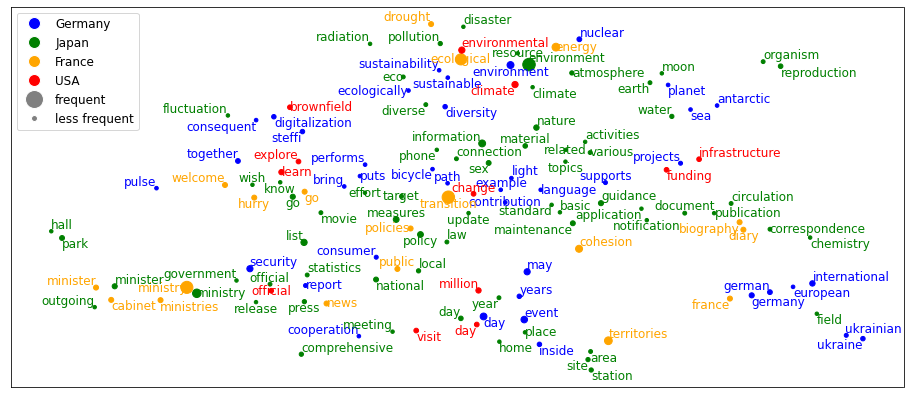

In [14]:
for exag in [12]:#this set of parameters works well, but loop allows explorations
    perp = 7#np.random.choice([2,4,6,8,10,12,16,32,64,128])
    #exag = 12#np.random.choice([2,4,8,16,32])
    Niter = 1024#np.random.choice([1024])
    print(perp,exag,Niter)
    plt.clf()
    plt.figure(figsize=(16,7))
    texts = []
    tsne = TSNE(n_components=2, n_iter=Niter, random_state=32, perplexity=perp, early_exaggeration=exag)#, init='pca'
    X2d = tsne.fit_transform(X)
    for LANG in LANGs:
        sym = "o"
        idx = (np.array(list_LANG) == LANG)
        if(LANG == "ja"):
            c = "green"
        elif(LANG == "de"):
            c = "blue"
        elif(LANG == "fr"):
            c = "orange"
        else:#en
            c = "red"
        
        x = X2d[idx,0]
        y = X2d[idx,1]
        words = np.array(list_words)[idx]
        plt.scatter(x,y,c=c,marker=sym,s=size[idx])
        for xx,yy,ww in zip(x,y,words):
            texts.append(plt.text(xx, yy, ww, fontsize=12, color=c))#https://github.com/Phlya/adjustText

#LEGEND
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Germany', markersize=12, markerfacecolor="blue"),
    Line2D([0], [0], marker='o', color='w', label='Japan', markersize=12, markerfacecolor="green"),
    Line2D([0], [0], marker='o', color='w', label='France', markersize=12, markerfacecolor="orange"),
    Line2D([0], [0], marker='o', color='w', label='USA', markersize=12, markerfacecolor="red"),
    Line2D([0], [0], marker='o', color='w', label='frequent', markersize=18, markerfacecolor="grey"),
    Line2D([0], [0], marker='o', color='w', label='less frequent', markersize=6, markerfacecolor="grey")]
    plt.legend(handles=legend_elements, prop={'size': 12})

    
    #optimize text alignment of annottions
    adjust_text(texts, only_move={'texts':'xy'}, 
                arrowprops=dict(arrowstyle="->", color='w', lw=0.0),
                lim=6, force_points=(0.002,0.005), force_text=(0.01,0.025), precision = 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("tSNE"+str(perp)+".pdf")
    plt.show()